### Grab 10 branch schools in California and give their locations

In [1]:
#Load the Python Environment
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import csv

print("All above libraries have been loaded!")

All above libraries have been loaded!


In [2]:
#Load all universitis and find the one belong to the university of california
scv_path='C:\\Users\\NPIC215TEA\\Desktop\\Socal and Norcal universities\\data_Univerity_CA.csv'
University_CA=pd.read_csv(scv_path, index_col=0)
University_CA.head()
University_CA.shape

UC_system=[]
for i in range(0, University_CA.shape[0]):
    name=University_CA.iloc[i,0]
    if 'University of California-' in name:
        UC_system.append(1)
    else:
        UC_system.append(0)
        
University_CA['Belong_UC']=UC_system
University_UC=University_CA[University_CA['Belong_UC']==1]
University_UC.sort_values(by=['Enroll'], inplace=True, ascending=False)
University_UC.reset_index(inplace=True, drop=True)
University_UC.drop(['Belong_UC','University_location'], axis=1, inplace=True)
print(University_UC.shape)
University_UC

#In this dataset, it does not include UCSF, but we will still work on these data 

(9, 6)


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,University,City,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller
0,University of California-Los Angeles,Los Angeles,44413,32978.0,55856.0,22878.0
1,University of California-Berkeley,Berkeley,40514,34356.0,57234.0,22878.0
2,University of California-Davis,Davis,36771,33759.0,56637.0,22878.0
3,University of California-San Diego,La Jolla,32420,31254.0,54132.0,22878.0
4,University of California-Irvine,Irvine,32069,31577.0,54455.0,22878.0
5,University of California-Santa Barbara,Santa Barbara,24492,34753.0,57631.0,22878.0
6,University of California-Riverside,Riverside,22963,32639.0,55517.0,22878.0
7,University of California-Santa Cruz,Santa Cruz,18922,34226.0,57104.0,22878.0
8,University of California-Merced,Merced,6568,34000.0,56878.0,22878.0


****

****

### Following, we will do some data analysis

1. From the data, we find that the In-State-Cost and Out-State-Cost are so different. The difference is up to 23,000 dollers.

2. Lets plot the enrollment number for each schools. and also plot the In-State-Cost versus university.


### 1. Enrollment number versus UC universities

In [3]:
#Load the needed Python environment for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

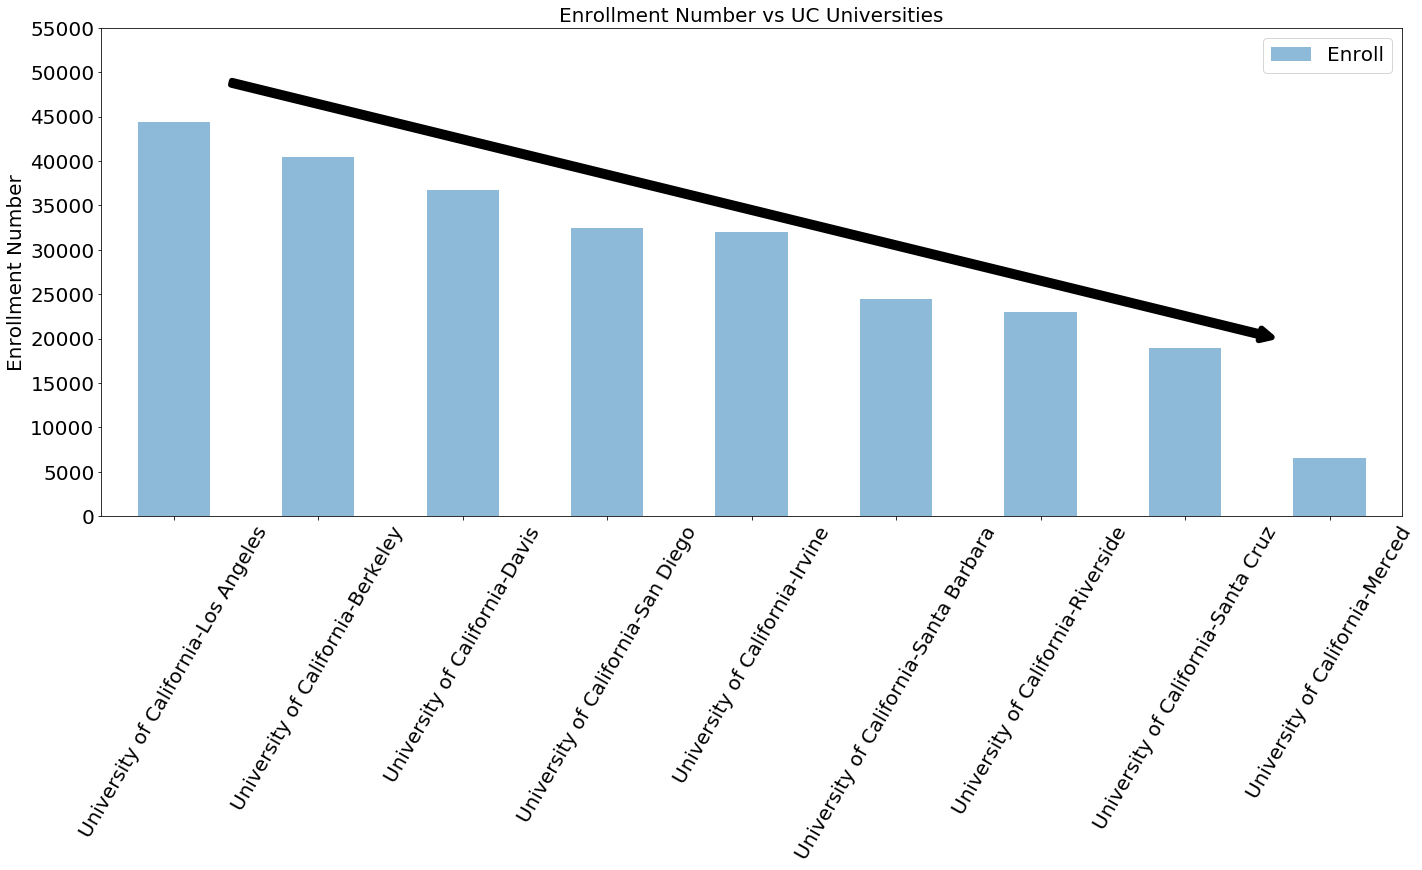

In [4]:
#Enrollment number versus UC universities
UC_enroll=University_UC[['University','Enroll']]
UC_enroll.set_index('University', inplace=True)
#print(UC_enroll)
UC_enroll.plot(kind='bar',
              figsize=(20,12),
              alpha=0.5)

plt.ylabel('Enrollment Number', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20, rotation=60)
plt.yticks(fontsize=20)
plt.yticks(np.arange(0,60000,5000))

plt.legend(fontsize=20)
plt.tight_layout()
plt.title('Enrollment Number vs UC Universities', fontsize=20)

plt.annotate('', 
            xytext=(0,UC_enroll.iloc[0,0]+6000),
            xy=((UC_enroll.shape[0]-1),UC_enroll.iloc[-1,0]+12000),
            xycoords='data',
            arrowprops=dict(facecolor='black',lw=6,shrink=0.05)
            )

plt.show()


### UCLA has more enrollment students and the UCM has the least

****

### 2. In State Cost versus UC universities

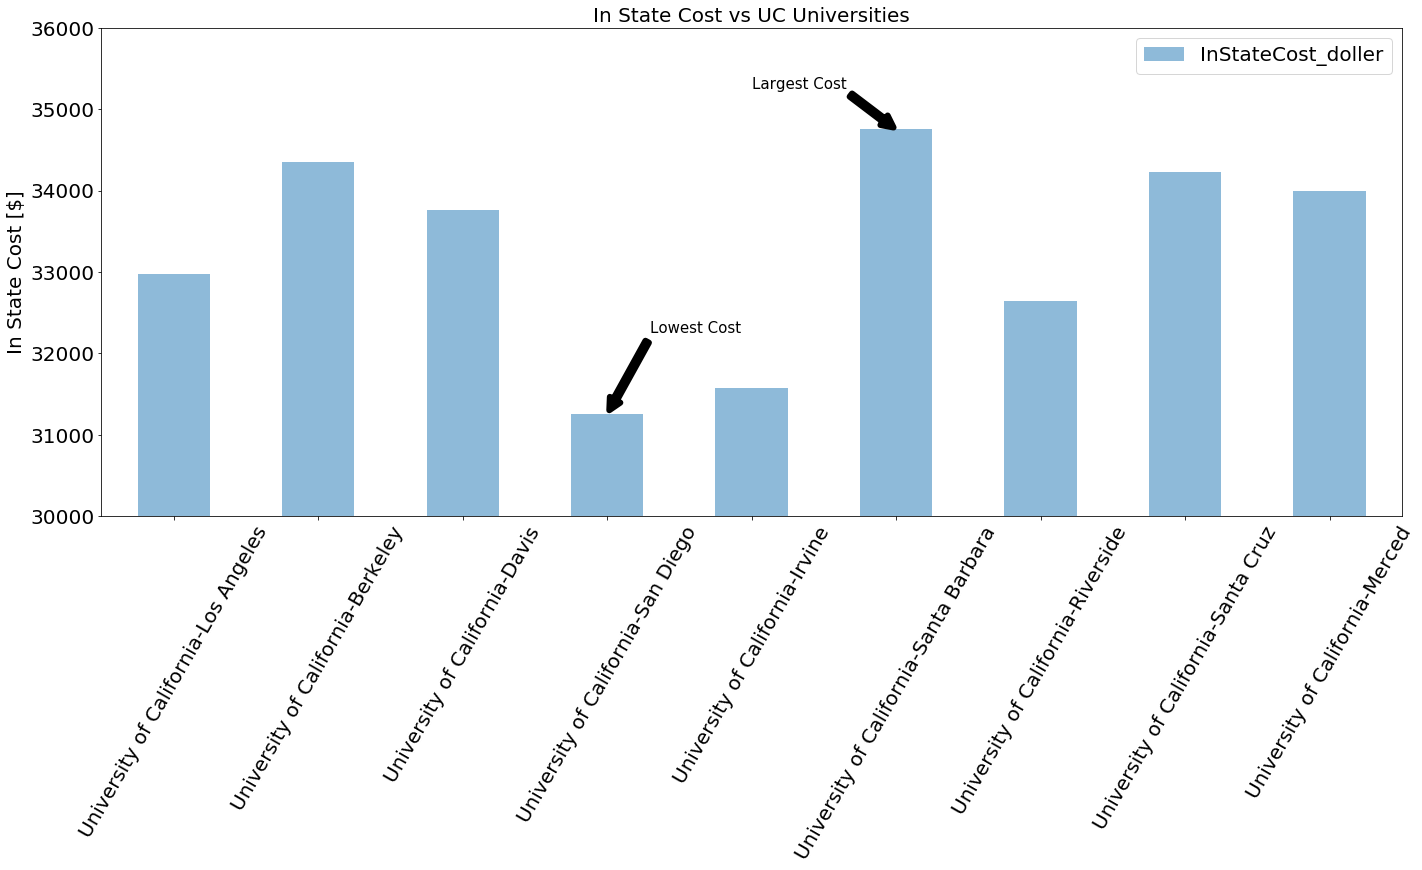

In [5]:
#In State Cost versus UC universities
UC_InCost=University_UC[['University','InStateCost_doller']]
UC_InCost.set_index('University', inplace=True)
#print(UC_enroll)
UC_InCost.plot(kind='bar',
              figsize=(20,12),
              alpha=0.5)

plt.ylabel('In State Cost [$]', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20, rotation=60)
plt.yticks(fontsize=20)
plt.yticks(np.arange(30000,60000,1000))
plt.ylim((30000, 36000))
plt.legend(fontsize=20)
plt.tight_layout()
plt.title('In State Cost vs UC Universities', fontsize=20)

plt.annotate('Lowest Cost', 
            xy=(3,UC_InCost.iloc[3,0]),
            xytext=(3.3,UC_InCost.iloc[3,0]+1000),
            xycoords='data',
            arrowprops=dict(facecolor='black',lw=6,shrink=0.05),
            fontsize=15)

plt.annotate('Largest Cost', 
            xy=(5,UC_InCost.iloc[5,0]),
            xytext=(4,UC_InCost.iloc[5,0]+500),
            xycoords='data',
            arrowprops=dict(facecolor='black',lw=6,shrink=0.05),
            fontsize=15)

plt.show()

### UCSD has the least In-State Tution cost, while UCSB has the most

****

****

### We will mark the location for each university in CA in the map using "folium"

In [93]:
# using ',' to replace the '-' for the university list in University_UC dataframe
University_UC['University']=University_UC['University'].str.replace('-',', ')      
University_UC.head()

C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,University,City,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller,Latitude,Longitude,Num_restaurant
0,"University of California,Los Angeles",Los Angeles,44413,32978.0,55856.0,22878.0,34.070878,-118.446850,50
1,"University of California,Berkeley",Berkeley,40514,34356.0,57234.0,22878.0,37.870946,-122.266399,50
2,"University of California,Davis",Davis,36771,33759.0,56637.0,22878.0,38.559815,-121.774229,22
3,"University of California,San Diego",La Jolla,32420,31254.0,54132.0,22878.0,32.879353,-117.231100,49
4,"University of California,Irvine",Irvine,32069,31577.0,54455.0,22878.0,33.643190,-117.840165,49


In [94]:
#Try to find the latitude and logitude of each university in UC systems
from geopy.geocoders import Nominatim

def lati_longi(address):
    geolocator = Nominatim(user_agent="user_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude, longitude

#Calfornia
Address_CA='Bakersfield'
Lati_CA, Longi_CA=lati_longi(Address_CA)
print('The geograpical coordinate of {} are {}, {}.\n'.format(Address_CA,Lati_CA,Longi_CA))

#Each school listed in the datafram
Latitude_U=[]
Longitude_U=[]

for address in list(University_UC['University']):
    print(address)
    lati, longi = lati_longi(address)
    Latitude_U.append(lati)
    Longitude_U.append(longi)

University_UC['Latitude']=Latitude_U
University_UC['Longitude']=Longitude_U

#This is the datafarme we will used for the new week explorations
University_UC.head()

The geograpical coordinate of Bakersfield are 35.3738712, -119.0194639.

University of California,Los Angeles
University of California,Berkeley
University of California,Davis
University of California,San Diego
University of California,Irvine
University of California,Santa Barbara
University of California,Riverside
University of California,Santa Cruz
University of California,Merced


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,University,City,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller,Latitude,Longitude,Num_restaurant
0,"University of California,Los Angeles",Los Angeles,44413,32978.0,55856.0,22878.0,34.070878,-118.446850,50
1,"University of California,Berkeley",Berkeley,40514,34356.0,57234.0,22878.0,37.870946,-122.266399,50
2,"University of California,Davis",Davis,36771,33759.0,56637.0,22878.0,38.559815,-121.774229,22
3,"University of California,San Diego",La Jolla,32420,31254.0,54132.0,22878.0,32.879353,-117.231100,49
4,"University of California,Irvine",Irvine,32069,31577.0,54455.0,22878.0,33.643190,-117.840165,49


In [95]:
#Let us make a map of all the university locations in this dataframe
#Loading the needed map
import folium

# create map of CA
map_CA = folium.Map(location=[Lati_CA, Longi_CA], zoom_start=6, tiles='Stamen Terrain')

# add markers to map
for lat, lng, label in zip(University_UC['Latitude'], University_UC['Longitude'], University_UC['University']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3126cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_CA)  
    
map_CA

****

****

### We will use the Foursquare app to find the 50 nearest supermarket within 5 km for the radius and try to analyze them.

_**Here, we use the Foursquare app, the upper limit of the places serach at each time is up to 50 and within radius up to 100,000. Then we chose LIMIT=50, radius=5000 in our case**_

In [304]:
#My credentials
CLIENT_ID = 'XZL0OAG2DY23VOYQ3IJ3A3TPURNRSTXNNP2FQYUQWBG1HUC2'
CLIENT_SECRET = 'OTZQ0IFXTCOENDVD3DUVJWOLFTPFL0WHTPFT2MXES50RLBMG' # your Foursquare Secret
VERSION = '20200701' # Foursquare API version

In [134]:
#Some needed functions
# function that extracts the category of the restaurant
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
radius=5000
LIMIT=50
search='market'

#make a function so that it can call each time
from pandas.io.json import json_normalize
def nearby_eating(location_U, latitude, longitude):

    eating_list=[]
    Food_num=[]
    i=1
    for name, lat, lng in zip(location_U, latitude, longitude):
        print(name)
    
        #Create the API link
        url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            search,
            radius,
            LIMIT)
    
        #Make the get request
        results=requests.get(url).json()
        #print(results)    
        restaurant = results['response']['venues']
        if restaurant!=[]:
            dataframe = json_normalize(restaurant)
            filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
            dataframe_filtered = dataframe.loc[:, filtered_columns]

            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

            # clean columns
            dataframe_filtered.columns = [col.split(".")[-1] for col in dataframe_filtered.columns]
            #print(dataframe_filtered.head())
            #print("We have {} results that matching the serach of restaurant.\n".format(dataframe_filtered.shape[0]))
            Food_num.append(dataframe_filtered.shape[0])
            # return only relevant information for each nearby venue
            eating_list.append([(
                name, 
                lat, 
                lng) for v in range(0,dataframe_filtered.shape[0])])

            nearby_rest = pd.DataFrame([item for eating_list in eating_list for item in eating_list])
            nearby_rest.columns = ['University_location', 
                                  'Latitude', 
                                  'Longitude']            
            #print(nearby_rest)
            if i == 1:
                U_eating_list=dataframe_filtered
            elif i!=1:
                U_eating_list=pd.concat([U_eating_list, dataframe_filtered])
                #print(U_eating_list)
            i=i+1
    U_eating_list.reset_index(inplace=True, drop=True)
            
    return nearby_rest,U_eating_list,Food_num

In [170]:
#Get the needed results
U_CA, U_CA_Super,Food_num = nearby_eating(location_U= University_UC['University'], 
                               latitude= University_UC['Latitude'], 
                               longitude= University_UC['Longitude'])

University of California,Los Angeles
University of California,Berkeley
University of California,Davis
University of California,San Diego
University of California,Irvine
University of California,Santa Barbara
University of California,Riverside


C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



University of California,Santa Cruz
University of California,Merced


In [171]:
#Collect all the data and cleanse them
University_UC['Num_Supermarket']=Food_num
University_UC

C:\Users\NPIC215TEA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,University,City,Enroll,InStateCost_doller,OutStateCost_doller,CostDiff_doller,Latitude,Longitude,Num_restaurant,Num_Supermarket
0,"University of California,Los Angeles",Los Angeles,44413,32978.0,55856.0,22878.0,34.070878,-118.446850,50,50
1,"University of California,Berkeley",Berkeley,40514,34356.0,57234.0,22878.0,37.870946,-122.266399,50,50
2,"University of California,Davis",Davis,36771,33759.0,56637.0,22878.0,38.559815,-121.774229,32,23
3,"University of California,San Diego",La Jolla,32420,31254.0,54132.0,22878.0,32.879353,-117.231100,50,50
4,"University of California,Irvine",Irvine,32069,31577.0,54455.0,22878.0,33.643190,-117.840165,50,50
5,"University of California,Santa Barbara",Santa Barbara,24492,34753.0,57631.0,22878.0,34.414594,-119.845819,50,27
6,"University of California,Riverside",Riverside,22963,32639.0,55517.0,22878.0,33.981457,-117.374703,50,50
7,"University of California,Santa Cruz",Santa Cruz,18922,34226.0,57104.0,22878.0,36.977541,-122.053377,50,45
8,"University of California,Merced",Merced,6568,34000.0,56878.0,22878.0,37.365453,-120.423136,22,3


Since some schools does not have to many restaurants surround. For better viewing the results, here we plot the bar chart to show the results and later we will try to map the locations of those restaurants surounding each University. 

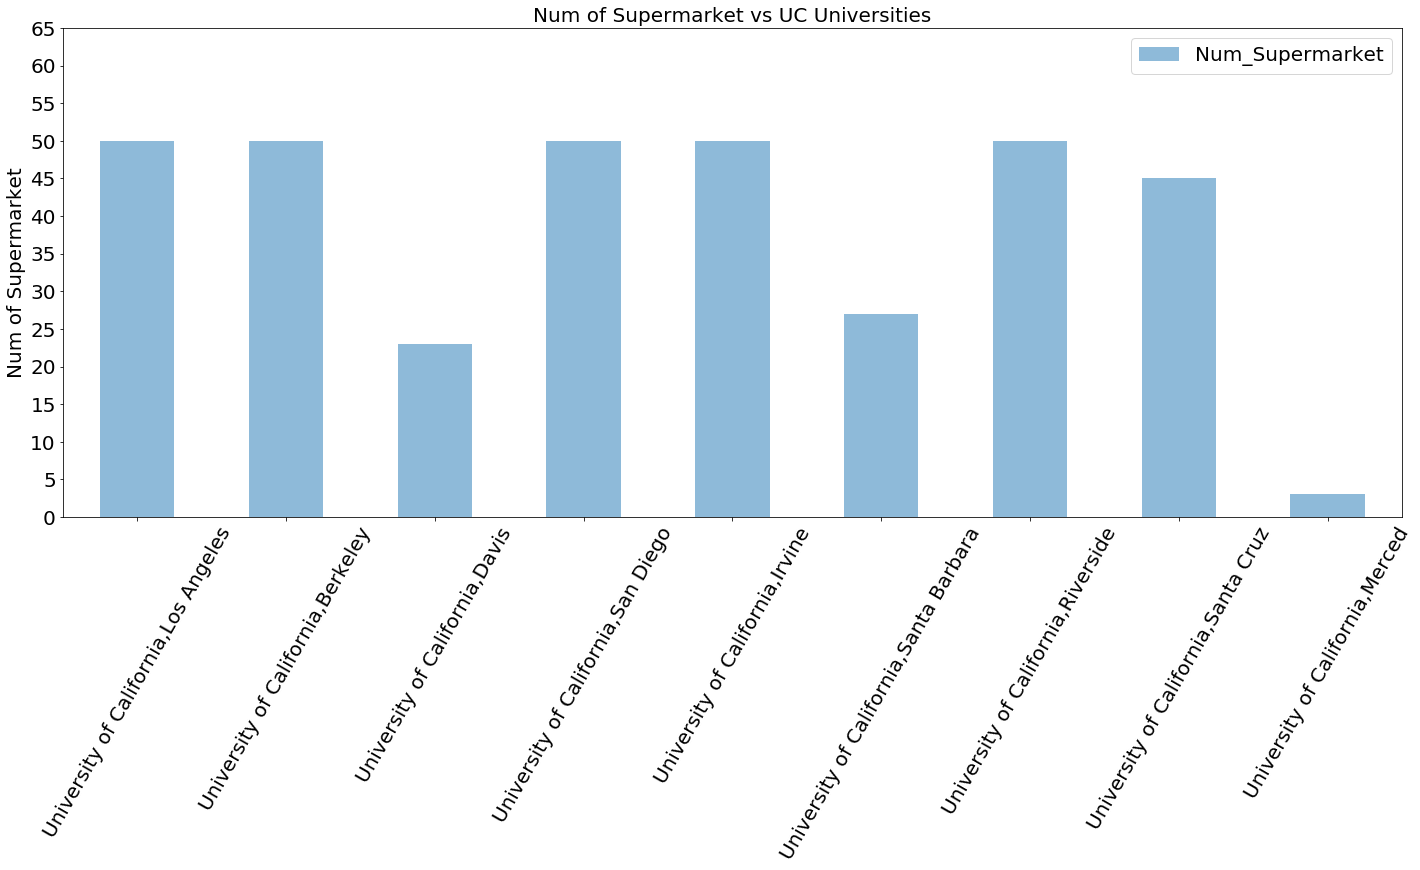

In [172]:
#In State Cost versus UC universities
UC_Super_num=University_UC[['University','Num_Supermarket']]
UC_Super_num.set_index('University', inplace=True)
#print(UC_enroll)
UC_Super_num.plot(kind='bar',
              figsize=(20,12),
              alpha=0.5)

plt.ylabel('Num of Supermarket', fontsize=20)
plt.xlabel('')
plt.xticks(fontsize=20, rotation=60)
plt.yticks(fontsize=20)
plt.yticks(np.arange(0,70,5))
plt.ylim((0, 65))
plt.legend(fontsize=20)
plt.tight_layout()
plt.title('Num of Supermarket vs UC Universities', fontsize=20)

plt.show()

**University of California-Merced, university of California-Santa Babara and University of California-Davis are different from other UC universities. Since fewer supermarket appear within 10,000 meters from the university.**

****

#### Next, we try to get the map that involves the location of each supermarket.

In [173]:
#Obtain all the restaruant info
UC_university_Super=pd.concat([U_CA,U_CA_Super], axis=1)
UC_university_Super.drop(['neighborhood','labeledLatLngs','crossStreet','formattedAddress','cc','country','state'],axis=1,inplace=True)
print(UC_university_Super.shape)
print(UC_university_Super.info())
UC_university_Super.head()

(348, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
University_location    348 non-null object
Latitude               348 non-null float64
Longitude              348 non-null float64
address                288 non-null object
categories             337 non-null object
city                   340 non-null object
distance               348 non-null int64
id                     348 non-null object
lat                    348 non-null float64
lng                    348 non-null float64
name                   348 non-null object
postalCode             310 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 32.7+ KB
None


,University_location,Latitude,Longitude,address,categories,city,distance,id,lat,lng,name,postalCode
0,"University of California,Los Angeles",34.070878,-118.44685,1000 S. Broxton,Farmers Market,Los Angeles,1071,4b7c78f8f964a5208b952fe3,34.061270,-118.446078,Westwood Village Farmer's Market,90024
1,"University of California,Los Angeles",34.070878,-118.44685,2130 Sawtelle Blvd Ste 105,Grocery Store,Los Angeles,3574,49dac6abf964a520af5e1fe3,34.039035,-118.441890,Nijiya Market,90025
2,"University of California,Los Angeles",34.070878,-118.44685,12121 W Pico Blvd,Supermarket,Los Angeles,4643,4d823fdbaff72d43699556bf,34.029288,-118.450787,Marukai Market,90064
3,"University of California,Los Angeles",34.070878,-118.44685,11011 Constitution Ave,Farmers Market,Los Angeles,1586,4c9916ed4cfb9eb038f854eb,34.060111,-118.458123,Westwood Farmers Market at The Vets Garden,90073
4,"University of California,Los Angeles",34.070878,-118.44685,10860 Santa Monica Blvd,Furniture / Home Store,Los Angeles,2572,4af8ea06f964a5208b1022e3,34.049289,-118.436890,Cost Plus World Market,90025


In [174]:
# make the functions to make the plot more easier
def get_map(university_name):
    index_num=University_UC[University_UC['University']==university_name].index.tolist()
    index_num=int(index_num[0])
    lati=University_UC.loc[index_num,'Latitude']
    lngi=University_UC.loc[index_num,'Longitude']
    map_Uni=folium.Map(location=[lati,lngi], zoom_start=12,titles='Stamen Terrain')
    certain_UC=UC_university_Super[UC_university_Super['University_location']==university_name]
    #print(certain_UC)
    print('There are {} Supermarkets within 5 km towards the {}.\n'.format(certain_UC.shape[0], university_name))
    
    for lat, lng, label in zip(certain_UC['lat'], certain_UC['lng'], certain_UC['name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#1925cc',
            fill_opacity=0.2,
            parse_html=False).add_to(map_Uni) 
    
    folium.CircleMarker(
        [lati, lngi],
        radius=8,
        popup=university_name,
        color='Orange',
        fill=True,
        fill_color='#2235cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Uni)  
    
    return certain_UC, map_Uni

In [229]:
## UCLA
address='University of California,Los Angeles'
UCLA, MAP_UCLA=get_map(address)
MAP_UCLA

There are 50 Supermarkets within 5 km towards the University of California,Los Angeles.



In [230]:
## UCB
address='University of California,Berkeley'
UCB, MAP_UCB=get_map(address)
MAP_UCB

There are 50 Supermarkets within 5 km towards the University of California,Berkeley.



In [231]:
## UCD
address='University of California,Davis'
UCD, MAP_UCD=get_map(address)
MAP_UCD

There are 23 Supermarkets within 5 km towards the University of California,Davis.



In [232]:
## UCSD
address='University of California,San Diego'
UCSD, MAP_UCSD=get_map(address)
MAP_UCSD

There are 50 Supermarkets within 5 km towards the University of California,San Diego.



In [233]:
## UCI
address='University of California,Irvine'
UCI, MAP_UCI=get_map(address)
MAP_UCI

There are 50 Supermarkets within 5 km towards the University of California,Irvine.



In [234]:
## UCSB
address='University of California,Santa Barbara'
UCSB, MAP_UCSB=get_map(address)
MAP_UCSB

There are 27 Supermarkets within 5 km towards the University of California,Santa Barbara.



In [235]:
## UCR
address='University of California,Riverside'
UCR, MAP_UCR=get_map(address)
MAP_UCR

There are 50 Supermarkets within 5 km towards the University of California,Riverside.



In [236]:
## UCSC
address='University of California,Santa Cruz'
UCSC, MAP_UCSC=get_map(address)
MAP_UCSC

There are 45 Supermarkets within 5 km towards the University of California,Santa Cruz.



In [237]:
## UCM
address='University of California,Merced'
UCM, MAP_UCM=get_map(address)
MAP_UCM

There are 3 Supermarkets within 5 km towards the University of California,Merced.



****
****

### So here, we will explore the universities in southern california

The universities include UCLA, UCR, UCI, UCSD, UCSB. Obtain the near school supermarket.

In [238]:
SoCal_U=['University of California,Los Angeles','University of California,Riverside','University of California,Irvine','University of California,San Diego', 'University of California,Santa Barbara']
SoCal_supermarket=UC_university_Super[UC_university_Super['University_location'].isin(SoCal_U)]
#Within 1000 meters, students will prefer to walk to buy things
SoCal_supermarket=SoCal_supermarket[SoCal_supermarket['distance']<=1000]
SoCal_supermarket.reset_index(inplace=True, drop=True)
SoCal_supermarket.shape
SoCal_supermarket

,University_location,Latitude,Longitude,address,categories,city,distance,id,lat,lng,name,postalCode
0,"University of California,Los Angeles",34.070878,-118.446850,NaN,Farmers Market,Los Angeles,186,4f9894b3e4b06ffc460e91e8,34.070942,-118.444827,UCLA Farmers Market (Bruin Plaza),90024
1,"University of California,Los Angeles",34.070878,-118.446850,NaN,Grocery Store,Los Angeles,222,50808592e4b068d89b1ae78f,34.070587,-118.444458,Bruin Store Market,90024
2,"University of California,Los Angeles",34.070878,-118.446850,NaN,Sandwich Place,Los Angeles,597,597f859b2e26804a1580d615,34.074460,-118.442020,Harvest Market,90024
3,"University of California,Los Angeles",34.070878,-118.446850,958 Gayley Ave,Liquor Store,Los Angeles,904,4b76413bf964a52074452ee3,34.062817,-118.448075,Stop Market,90024
4,"University of California,Los Angeles",34.070878,-118.446850,NaN,General College & University,Los Angeles,400,4f7cbf45e4b02e1313aaa674,34.073546,-118.443936,Marketing Department Walk-Up Window B4.02,90024
5,"University of California,Los Angeles",34.070878,-118.446850,NaN,General College & University,Los Angeles,472,516356a1498e357ff1160022,34.074020,-118.443398,Marketing & Communications Office D3.04,NaN
6,"University of California,San Diego",32.879353,-117.231100,9500 Gilman Dr,Market,La Jolla,446,4b8ec47df964a520e33533e3,32.881780,-117.234899,Sunshine Market,92093
7,"University of California,San Diego",32.879353,-117.231100,9500 Gilman Dr,Farmers Market,La Jolla,478,4eb9923df7906cc558401f2b,32.878870,-117.236187,UCSD Farmer's Market,92093
8,"University of California,San Diego",32.879353,-117.231100,9500 Gilman Dr,Burrito Place,La Jolla,956,4ad4d7d7f964a5202dfc20e3,32.882860,-117.240445,Goody's Place and Market,92093
9,"University of California,San Diego",32.879353,-117.231100,Eleanor Roosevelt Ln,Snack Place,La Jolla,142,4d275a82b818a35d02d28a8a,32.878069,-117.231103,Marciano's Place (6th Market),92093


In [241]:
#Get the map
# make the functions to make the plot more easier   

#Calfornia
Address_LA='Anaheim'
Lati_LA, Longi_LA=lati_longi(Address_LA)

map_SU=folium.Map(location=[Lati_LA, Longi_LA], zoom_start=8,titles='Stamen Terrain')

for lat, lng, label in zip(SoCal_supermarket['lat'], SoCal_supermarket['lng'], SoCal_supermarket['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#1925cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_SU) 
    
map_SU    


In [305]:
# We grab the ratings and some other related things for each supermarket listed here
def ratings(name,Super_id):
    i=1
    nn=0
    tip_num=[]
    for rid in Super_id:    
        #Create the API link
        print('{} with id: {}.'.format(name[nn], rid))
        url='https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            rid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
        #Make the get request
        results=requests.get(url).json()   
        Super = results['response']['venue']
        tip_count = results['response']['venue']['tips']['count']
        tip_num.append(tip_count)
        
        #print(restaurant.keys())
        if Super!=[]:
            dataframe = json_normalize(Super)
            filtered_columns = ['name', 'categories', 'rating'] 
            dataframe_filtered = dataframe.loc[:, filtered_columns]
            
            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

            # clean columns
            dataframe_filtered.columns = [col.split(".")[-1] for col in dataframe_filtered.columns]

            # return only relevant information for each nearby venue
            #print(nearby_rest)
            if i == 1:
                U_Super_list=dataframe_filtered
            elif i!=1:
                U_Super_list=pd.concat([U_Super_list, dataframe_filtered])
                #print(U_eating_list)
            i=i+1
            nn=nn+1
    U_Super_list.reset_index(inplace=True, drop=True)
    U_Super_list['Tip_num']=tip_num
    
    return U_Super_list

In [306]:
#Get ratings
Ratings_Super_SoCal=ratings(name=list(SoCal_supermarket['name']),Super_id=list(SoCal_supermarket['id']))
print(Ratings_Super_SoCal.shape)

UCLA Farmers Market (Bruin Plaza) with id: 4f9894b3e4b06ffc460e91e8.
Bruin Store Market with id: 50808592e4b068d89b1ae78f.
Harvest Market with id: 597f859b2e26804a1580d615.
Stop Market with id: 4b76413bf964a52074452ee3.
Marketing Department Walk-Up Window B4.02 with id: 4f7cbf45e4b02e1313aaa674.
Marketing & Communications Office D3.04 with id: 516356a1498e357ff1160022.
Sunshine Market with id: 4b8ec47df964a520e33533e3.
UCSD Farmer's Market with id: 4eb9923df7906cc558401f2b.
Goody's Place and Market with id: 4ad4d7d7f964a5202dfc20e3.
Marciano's Place (6th Market) with id: 4d275a82b818a35d02d28a8a.
Behneman Farms Market with id: 513128fbe4b0ed892d28559d.
Earl's Place and Market with id: 4c9936dad4b1b1f7f8bcc535.
Advanced Marketing Strategies with id: 53a8a4b0498ef2b97f8737ef.
The Patio Marketplace with id: 59ce65d94c954c6df0774636.
Irvine Farmers Market with id: 4b5b25adf964a5207be628e3.
Zot-n-Go Market with id: 4ba13a03f964a520d9a337e3.
MagicHat Web Design & Marketing with id: 59266984a

,name,categories,rating,Tip_num
0,UCLA Farmers Market (Bruin Plaza),Farmers Market,NaN,0
1,Bruin Store Market,Grocery Store,NaN,0
2,Harvest Market,Sandwich Place,NaN,0
3,Stop Market,Liquor Store,NaN,0
4,Marketing Department Walk-Up Window B4.02,General College & University,NaN,0


In [308]:
#We fuond not too many places has been rated using the FourSquare map
#We only deal with the rated data
temp=Ratings_Super_SoCal.dropna()
print(temp)
index_num_ratings=np.array(temp.index)
All_info=SoCal_supermarket.iloc[index_num_ratings,:]
Ratings_Super_SoCal=pd.concat([All_info[['id','name','University_location','distance']],temp[['categories','rating','Tip_num']]],axis=1)
Ratings_Super_SoCal.sort_values(by=['rating'],ascending=True,inplace=True)
Ratings_Super_SoCal.reset_index(inplace=True, drop=True)
Ratings_Super_SoCal

                                        name      categories  rating  Tip_num
6                            Sunshine Market          Market     5.8        9
7                       UCSD Farmer's Market  Farmers Market     8.1        7
8                   Goody's Place and Market   Burrito Place     6.1        8
14                     Irvine Farmers Market  Farmers Market     8.7       30
18  Clark's Nutrition & Natural Foods Market   Grocery Store     8.8        3
19         Downtown Riverside Farmers Market  Farmers Market     7.2        7
28                                 Starbucks     Coffee Shop     7.3       10


,id,name,University_location,distance,categories,rating,Tip_num
0,4b8ec47df964a520e33533e3,Sunshine Market,"University of California,San Diego",446,Market,5.8,9
1,4ad4d7d7f964a5202dfc20e3,Goody's Place and Market,"University of California,San Diego",956,Burrito Place,6.1,8
2,4c8bd1afc37a6dcbf060f17a,Downtown Riverside Farmers Market,"University of California,Riverside",372,Farmers Market,7.2,7
3,4a70f117f964a520d6d81fe3,Starbucks,"University of California,Riverside",676,Coffee Shop,7.3,10
4,4eb9923df7906cc558401f2b,UCSD Farmer's Market,"University of California,San Diego",478,Farmers Market,8.1,7
5,4b5b25adf964a5207be628e3,Irvine Farmers Market,"University of California,Irvine",828,Farmers Market,8.7,30
6,4b6c775df964a520633c2ce3,Clark's Nutrition & Natural Foods Market,"University of California,Riverside",497,Grocery Store,8.8,3



It seems that the Farmers Market is very popular among the universities.

**Saying if I am a student whoe doesn't have a car. And I live offcampus but it only take me 5 minuts to bike to school. I can bear bike or walk to the market within 1000 m distance awasy from the university. Then the question comes like that which market we should chose to go to.**

If we just see the scores, it is obviouse. But we still need to look into the tips. Here we will grab 10 tips from each supermarket.

In [318]:
#We need to know the things related to the tips and the number of the tips, we will just focus on the first tip
limit=1

def tips(name,Super_id):
    i=1
    nn=0
    for rid in Super_id:
        name_market=[]
        #Create the API link
        print('{} with id: {}.'.format(name[nn], rid))
        url='https://api.foursquare.com/v2/venues/{}/tips?&client_id={}&client_secret={}&v={}&limit={}'.format(
            rid,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            limit)
    
        #Make the get request
        results=requests.get(url).json()   
        tips = results['response']['tips']['items']
        
        #print(restaurant.keys())
        if tips!=[]:
            dataframe = json_normalize(tips)
            filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id'] 
            dataframe_filtered = dataframe.loc[:, filtered_columns]

            if i == 1:
                tip_list=dataframe_filtered
            elif i!=1:
                tip_list=pd.concat([tip_list, dataframe_filtered])
            i=i+1
            nn=nn+1
    tip_list.reset_index(inplace=True, drop=True)        
    return tip_list


In [319]:
#Get tips
Tip_text=tips(name=list(Ratings_Super_SoCal['name']),Super_id=list(Ratings_Super_SoCal['id']))
Tip_text.head()

Sunshine Market with id: 4b8ec47df964a520e33533e3.
Goody's Place and Market with id: 4ad4d7d7f964a5202dfc20e3.
Downtown Riverside Farmers Market with id: 4c8bd1afc37a6dcbf060f17a.
Starbucks with id: 4a70f117f964a520d6d81fe3.
UCSD Farmer's Market with id: 4eb9923df7906cc558401f2b.
Irvine Farmers Market with id: 4b5b25adf964a5207be628e3.
Clark's Nutrition & Natural Foods Market with id: 4b6c775df964a520633c2ce3.


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Best deals on campus for food and take out. Good place to grab a snack. Cheap coffee drinks, too.",1,0,4bb52ea470c603bbc67296b4,Scott,M,NaN,245560
1,Goody's Market's selection of goods is larger and better than certain other HDH markets. E.g. Mexican coke.,1,0,5464484b498e2f00561f55bf,Tommy,Y,NaN,334262
2,Always have fresh berries at a good price! They are always delicious! Find seedlings for your gardens here...,0,0,53e466ba498ea5df41d24083,Andrea,S,NaN,45553501
3,"One of the busiest stores I've been to. If you mobile order, double (or triple in the morning) the usual time. Kudos to the staff for being friendly and efficient in the chaos.",0,0,5c86b4ad42d8c2002bcfe5bb,Su,M,NaN,1351325
4,Belinda's Mexican food is usually on point. Try the relleno burrito. Be sure Belinda is the one who makes your food. She's the best.,1,0,5180595e498ea758fb187919,Scott,M,NaN,245560


In [324]:
temp_tips=Tip_text.drop(['user.gender'],axis=1)
pd.set_option('display.max_colwidth', -1)
Customer_feedback=pd.concat([Ratings_Super_SoCal[['name','University_location','distance']],temp_tips[['text','agreeCount','disagreeCount','user.id']]],axis=1)
Customer_feedback

,name,University_location,distance,text,agreeCount,disagreeCount,user.id
0,Sunshine Market,"University of California,San Diego",446,"Best deals on campus for food and take out. Good place to grab a snack. Cheap coffee drinks, too.",1,0,245560
1,Goody's Place and Market,"University of California,San Diego",956,Goody's Market's selection of goods is larger and better than certain other HDH markets. E.g. Mexican coke.,1,0,334262
2,Downtown Riverside Farmers Market,"University of California,Riverside",372,Always have fresh berries at a good price! They are always delicious! Find seedlings for your gardens here...,0,0,45553501
3,Starbucks,"University of California,Riverside",676,"One of the busiest stores I've been to. If you mobile order, double (or triple in the morning) the usual time. Kudos to the staff for being friendly and efficient in the chaos.",0,0,1351325
4,UCSD Farmer's Market,"University of California,San Diego",478,Belinda's Mexican food is usually on point. Try the relleno burrito. Be sure Belinda is the one who makes your food. She's the best.,1,0,245560
5,Irvine Farmers Market,"University of California,Irvine",828,"Go for the ""Baba Food"" Hummus! I particularly like the Avocado 'n Cilantro Hummus so yummy ! Then head to ""Tarts 'n Things"" they do have great tarts dun miss the mango tart.",1,0,25017401
6,Clark's Nutrition & Natural Foods Market,"University of California,Riverside",497,Great selection of organic fruits and veggies and tons of gluten free choices as well.,0,0,47484820


#### From the tips, we does get a lot of info.

##### For me who live in Riverside area, and often drink Starbucks. The morning time the starbucks will be very busy.

## Here we concluded our capstone.